<a href="https://colab.research.google.com/github/VANSHKALRA88/AI-Driven-Fuel-Efficiency-Predictor-for-Next-Gen-Vehicles/blob/main/AI_Driven_Fuel_Efficiency_Predictor_for_Next_Gen_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

print(df.head())

Saving auto-mpg.csv to auto-mpg (1).csv
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.drop(columns=['car name'],inplace=True)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')


df.dropna(subset=['horsepower', 'weight'], inplace=True)


df['power_to_weight'] = df['horsepower'] / df['weight']

print(df[['power_to_weight']].head())


   power_to_weight
0         0.037100
1         0.044679
2         0.043655
3         0.043694
4         0.040591


In [15]:
df['Vehicle_age']=2025-(1900+df['model year'])

In [16]:
print(df['Vehicle_age'])

0      55
1      55
2      55
3      55
4      55
       ..
393    43
394    43
395    43
396    43
397    43
Name: Vehicle_age, Length: 392, dtype: int64


In [18]:
df['Efficient'] = (df['mpg'] > df['mpg'].mean()).astype(int)
print(df['Efficient'])

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: Efficient, Length: 392, dtype: int64


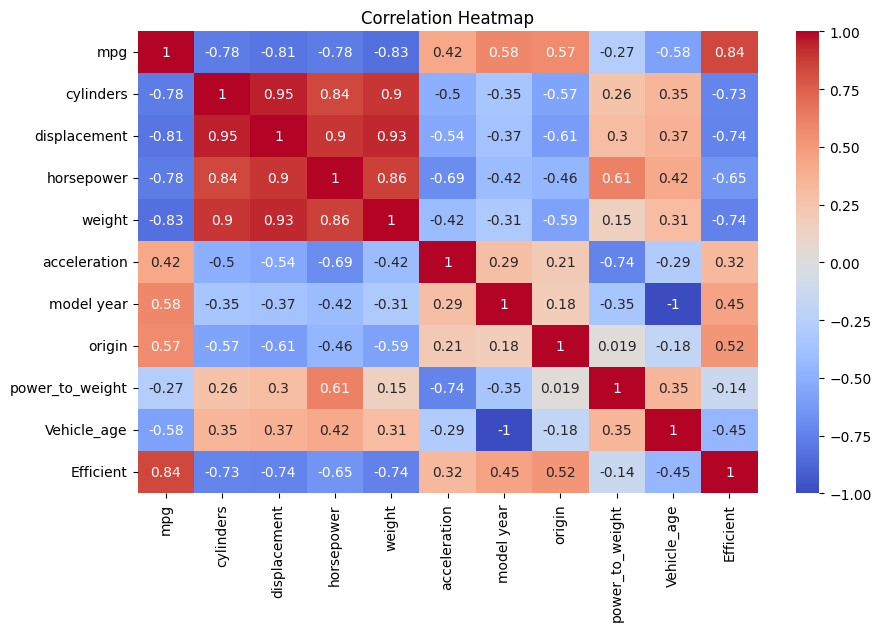

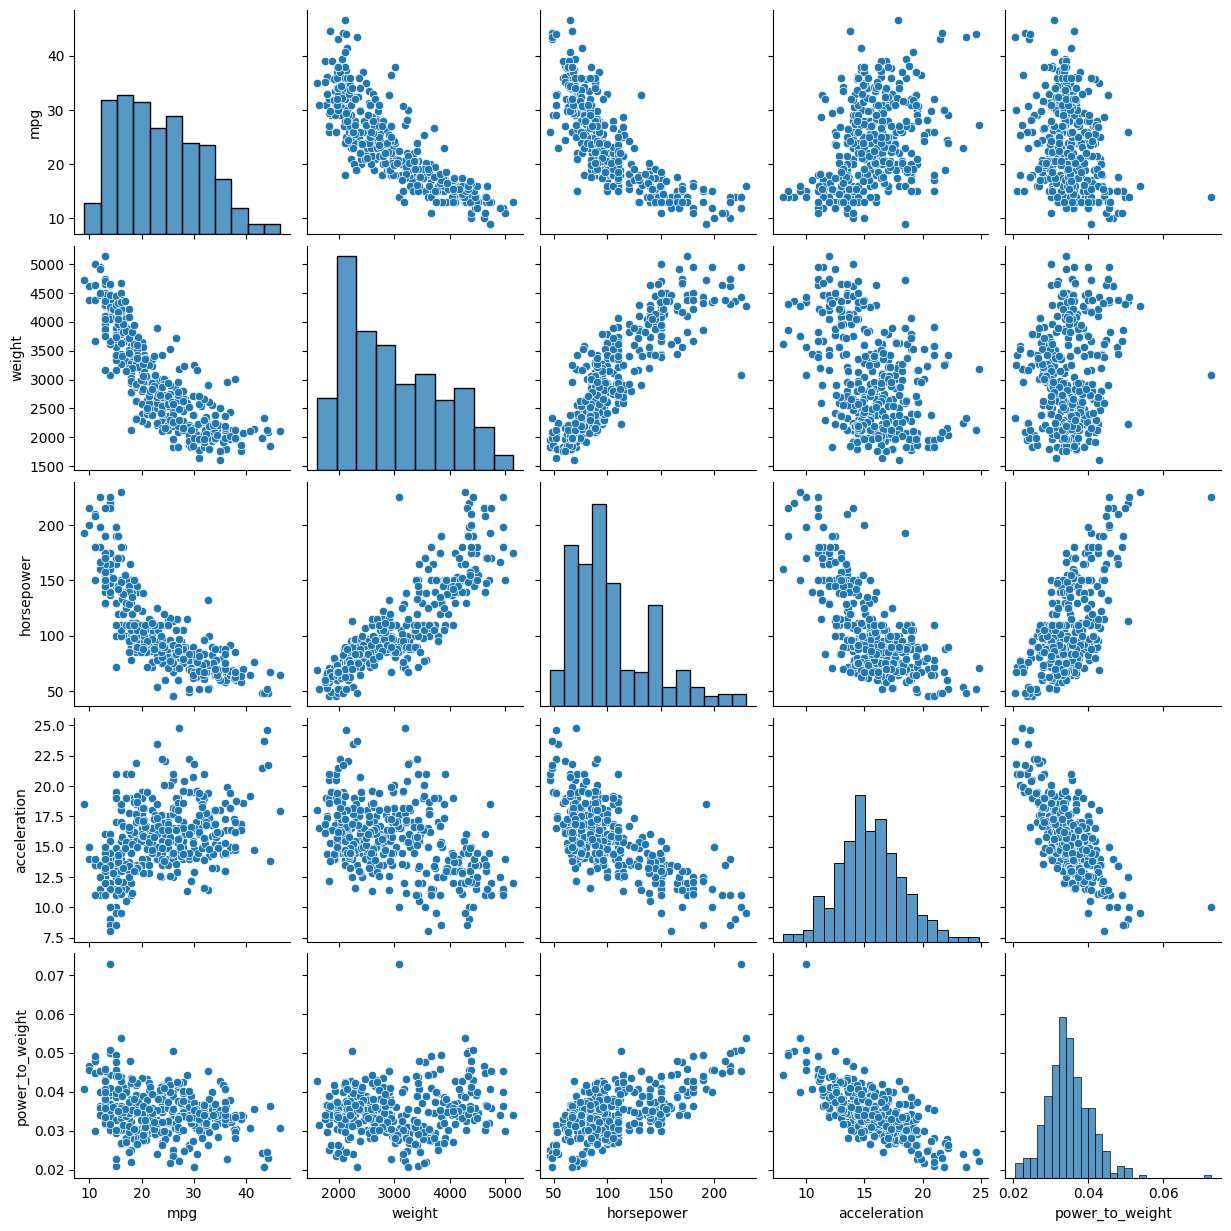

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


sns.pairplot(df[['mpg', 'weight', 'horsepower', 'acceleration', 'power_to_weight']])
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'power_to_weight', 'Vehicle_age']]
y = df['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}:")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"  R²: {r2_score(y_test, y_pred):.2f}\n")


Linear Regression:
  MAE: 2.56
  MSE: 9.97
  R²: 0.80

Random Forest:
  MAE: 1.75
  MSE: 6.09
  R²: 0.88

Support Vector Machine:
  MAE: 2.04
  MSE: 9.33
  R²: 0.82

K-Nearest Neighbors:
  MAE: 2.16
  MSE: 8.05
  R²: 0.84



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best R2 Score: 0.8602466193589665


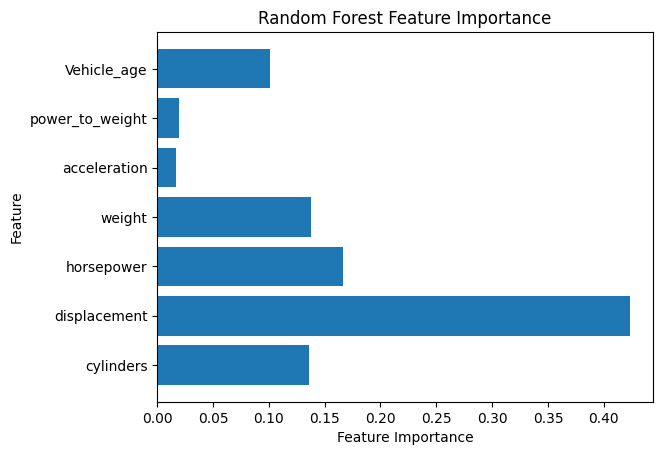

In [23]:
import matplotlib.pyplot as plt

feat_imp = grid.best_estimator_.feature_importances_
plt.barh(X.columns, feat_imp)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


In [27]:
!pip install dash


In [29]:
import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)

fig = px.scatter(df, x='weight', y='mpg', color='origin', title='MPG vs Weight')
app.layout = html.Div([
    html.H1("Vehicle Fuel Efficiency Dashboard"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run(debug=True)

    # 1 - USA
    # 2 - JAPAN
    # 3 - EUROPE

<IPython.core.display.Javascript object>